In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
X_train = pd.read_csv('Linear_X_Train.csv')
y_train = pd.read_csv('Linear_Y_Train.csv')
X_test = pd.read_csv('Linear_X_Test.csv')

In [70]:
X_train = X_train.values
y_train = y_train.values

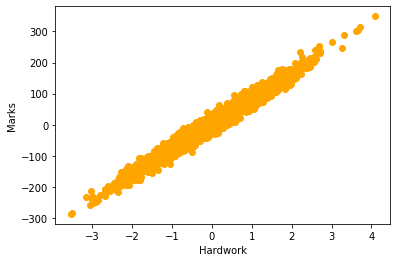

In [71]:
plt.scatter(X_train,y_train, color = 'Orange')
plt.xlabel('Hardwork')
plt.ylabel('Marks')
plt.show()

####  Preprocessing the Data
* Makes GD faster

In [72]:
# Standardisation

mu = X_train.mean()
sig = X_train.std()

In [73]:
X_train = (X_train - mu) / sig

## Linear Regression

In [74]:
def hypotheis(x, theta):
    '''
    theta : np.array(2,1)
    x: scaler value
    
    return : y prediction
    '''
    return theta[0] + theta[1] * x

In [75]:
def error(X, Y, theta):
    '''
    X - (3750,1)
    Y - (3750,1)
    theta - (2,1)
    
    return : Total error of every hypothesis
    '''
    m = X.shape[0]
    total_err = 0.0

    for i in range(m):
        yhat_i = hypotheis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2

        return total_err /2 * m

In [76]:
def gradient(X, Y, theta):
    ''' 
    X - (3750,1)
    Y - (3750,1)
    theta - (2,1)
    
    return: np array gradient (2,1)
    '''
    m = X.shape[0]
    grad = np.zeros(2)

    for i in range(m):
        yhat_i = hypotheis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi) * X[i]

    return grad / m

In [77]:
def gradient_descent(X, Y, lr=0.1, max_itr=100):
    ''' 
    X - (3750,1)
    Y - (3750,1)
    theta - (2,1)
    lr - learning rate
    max_itr - Maximum Iteration
   ------------------------------------------------------
    return: 
        theta vector (2,1) 
        error_list 
    
    '''
    theta = np.zeros(2, )

    error_list = []

    for i in range(max_itr):

        err = error(X, Y, theta)
        error_list.append(err)

        grad = gradient(X, Y, theta)

        #Updation Rule
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr * grad[1]

    return theta, error_list

In [78]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)

In [79]:
opt_theta

array([ 0.6838508 , 79.90361453])

In [84]:
X_train

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

In [89]:
y_cap = hypotheis(X_train, opt_theta)

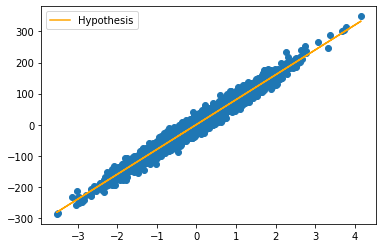

In [94]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_cap, color='orange', label='Hypothesis')
plt.legend()
plt.show()

## Test Data

In [97]:
X_test.values

array([[-1.87794441],
       [-0.86903192],
       [-2.53018242],
       ...,
       [ 0.12800782],
       [-0.27803759],
       [-0.68042543]])

In [99]:
#Standardisation of Data for X_test

X_test = (X_train- mu)/sig

In [100]:
y_pred = hypotheis(X_test , opt_theta)

In [104]:
df = pd.DataFrame(data = y_pred, columns= ['y'], index = None)

In [105]:
df.to_csv('Linear Regression.csv')

### R2 score

In [106]:
y_pred_on_train = hypotheis(X_train, opt_theta)

In [107]:
def r2_score(Y, Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum(( Y - Y.mean()) ** 2)
    
    score = 1 - (num/denom)
    
    return score

In [108]:
r2_score(y_train, y_pred_on_train)

0.9709612226971643

## Sklearn

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
linreg = LinearRegression().fit(X_train,y_train)

In [111]:
linreg.score(X_train,y_train)

0.9709612233822353

In [113]:
y_pred1 = linreg.predict(X_test)

In [114]:
linreg.intercept_

array([0.68386897])

In [115]:
linreg.coef_

array([[79.90573694]])

In [116]:
opt_theta

array([ 0.6838508 , 79.90361453])